In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


#https://medium.com/@danalindquist/using-new-york-times-api-and-jq-to-collect-news-data-a5f386c7237b


In [2]:
from nytimesarticle import articleAPI
api = articleAPI('nYc8XwaFDU8Sn3eOJMDdDFnxqhY305uL')

In [3]:
import requests

my_key = 'nYc8XwaFDU8Sn3eOJMDdDFnxqhY305uL'

#pull request for 2019 and January
url = 'https://api.nytimes.com/svc/archive/v1/2019/1.json?api-key=nYc8XwaFDU8Sn3eOJMDdDFnxqhY305uL'

r = requests.get(url)

json_data = r.json()

In [4]:
import pyjq

num_docs = pyjq.all('.response .docs | length',json_data)[0]

In [5]:
num_docs

6977

In [6]:
jq_query = f'.response .docs [] | {{the_snippet: .snippet, the_headline: .headline .main, the_date: .pub_date, the_news_desk: .news_desk}}'

In [7]:
output = pyjq.all(jq_query, json_data)

In [8]:
output[20]

OrderedDict([('the_snippet',
              'Fewer people were killed last year in vehicle crashes, a sign that Mayor Bill de Blasio’s Vision Zero plan is working. But pedestrian deaths increased.'),
             ('the_headline',
              'Traffic Deaths in New York City Drop to 200, a Record Low'),
             ('the_date', '2019-01-01T20:17:49+0000'),
             ('the_news_desk', 'Metro')])

In [9]:
test_df = pd.DataFrame(output)

In [10]:
test_df

,the_snippet,the_headline,the_date,the_news_desk
0,"He and his wife, Toni Tennille, were one of th...","Daryl Dragon, of the Captain and Tennille Pop ...",2019-01-03T00:10:00+0000,Obits
1,"In Sweden, midwives deliver babies. But doula ...",Where Doulas Calm Nerves and Bridge Cultures D...,2019-01-02T22:17:38+0000,Foreign
2,The fairness of elections and voting have beco...,Voting Issues and Gerrymanders Are Now Key Pol...,2019-01-02T17:00:47+0000,Politics
3,The National Women’s Law Center urges that law...,Protecting Pregnant Workers,2019-01-02T18:26:54+0000,Letters
4,"“Tragedies like Parkland can never be funny,” ...",When Louis C.K. Crossed a Line,2019-01-02T18:32:59+0000,Letters
5,Andrew Bujalski’s “Support the Girls” hits Hul...,What’s on TV Thursday: ‘Support the Girls’ and...,2019-01-03T06:00:04+0000,Culture
6,The act by two women in the state of Kerala fo...,"2 Indian Women Enter Sabarimala Temple, Settin...",2019-01-02T12:37:37+0000,Foreign
7,We let her go to an expensive private college....,Our Daughter’s Rich Friends Are Driving Me Nuts,2019-01-03T15:49:33+0000,Styles
8,Whether you’re worried about getting the boot ...,What to Do When You Think You’re About to Get ...,2019-01-02T22:30:06+0000,Smarter Living
9,The Massachusetts senator is forming a preside...,On Politics: Elizabeth Warren Is Running for P...,2019-01-01T05:18:48+0000,Politics


In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andrewberry/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andrewberry/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
text = (test_df['the_snippet'])[15]
text

'During the contentious meeting, the president made his case for a border wall and rejected Democrats’ proposals for reopening the government while the two sides ironed out their differences.'

In [13]:
from nltk.tokenize import sent_tokenize

In [14]:
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['During the contentious meeting, the president made his case for a border wall and rejected Democrats’ proposals for reopening the government while the two sides ironed out their differences.']


In [15]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['During', 'the', 'contentious', 'meeting', ',', 'the', 'president', 'made', 'his', 'case', 'for', 'a', 'border', 'wall', 'and', 'rejected', 'Democrats', '’', 'proposals', 'for', 'reopening', 'the', 'government', 'while', 'the', 'two', 'sides', 'ironed', 'out', 'their', 'differences', '.']


In [16]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 28 samples and 32 outcomes>


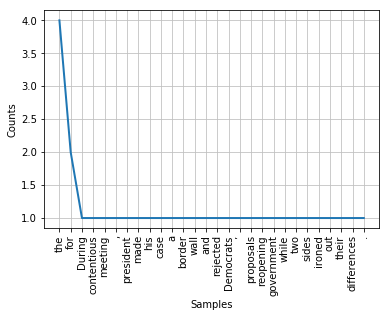

In [17]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [18]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
#print(stop_words)

In [19]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['During', 'the', 'contentious', 'meeting', ',', 'the', 'president', 'made', 'his', 'case', 'for', 'a', 'border', 'wall', 'and', 'rejected', 'Democrats', '’', 'proposals', 'for', 'reopening', 'the', 'government', 'while', 'the', 'two', 'sides', 'ironed', 'out', 'their', 'differences', '.']
Filterd Sentence: ['During', 'contentious', 'meeting', ',', 'president', 'made', 'case', 'border', 'wall', 'rejected', 'Democrats', '’', 'proposals', 'reopening', 'government', 'two', 'sides', 'ironed', 'differences', '.']


In [20]:
from textblob import TextBlob



In [21]:
text = (test_df['the_snippet'])[6971]
text

'A top diplomat said the Trump administration might not need an immediate inventory of nuclear assets from North Korea, a shift that could help diplomacy.'

In [22]:
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity,3) for article in test_df['the_snippet']]


In [23]:
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

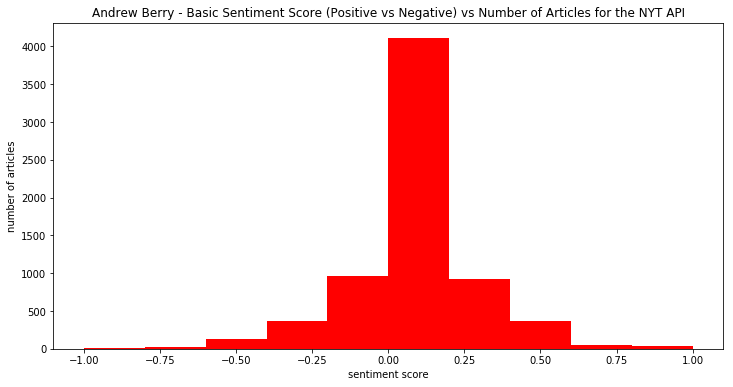

In [24]:
plt.figure(figsize = (12,6))
plt.hist(sentiment_scores_tb, color = 'red')
plt.xlabel('sentiment score')
plt.ylabel('number of articles')
plt.title('Andrew Berry - Basic Sentiment Score (Positive vs Negative) vs Number of Articles for the NYT API')
plt.show()